In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import os 

In [2]:
# Load the dataset
UM_dataset = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv', low_memory=False)

# Ensure 'Year of event' is an integer (should already be if correctly formatted)
UM_dataset['Year of event'] = pd.to_numeric(UM_dataset['Year of event'], errors='coerce')

# Filter for events between 2000 and 2022
UM_dataset_filtered = UM_dataset[(UM_dataset['Year of event'] >= 2000) & (UM_dataset['Year of event'] <= 2022)]

print(UM_dataset_filtered.columns)

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID'],
      dtype='object')


In [3]:
unique_distances = UM_dataset_filtered['Event distance/length'].unique()
print(len(unique_distances))

2057


In [4]:
# Time-based events dataset
time_based_events = UM_dataset_filtered[UM_dataset_filtered['Event distance/length'].str.contains('h')].copy()

# Distance-based events dataset
distance_based_events = UM_dataset_filtered[~UM_dataset_filtered['Event distance/length'].str.contains('h')].copy()

# Drop rows where 'Gender' is NaN for clean up
time_based_events.dropna(subset=['Athlete gender'], inplace=True)
distance_based_events.dropna(subset=['Athlete gender'], inplace=True)

print(time_based_events.head())
print(distance_based_events.head())

    Year of event Event dates  \
22           2018  06.01.2018   
23           2018  06.01.2018   
24           2018  06.01.2018   
25           2018  06.01.2018   
26           2018  06.01.2018   

                                           Event name Event distance/length  \
22  6 Stunden Self-Transcendence Sri Chinmoy Smole...                    6h   
23  6 Stunden Self-Transcendence Sri Chinmoy Smole...                    6h   
24  6 Stunden Self-Transcendence Sri Chinmoy Smole...                    6h   
25  6 Stunden Self-Transcendence Sri Chinmoy Smole...                    6h   
26  6 Stunden Self-Transcendence Sri Chinmoy Smole...                    6h   

    Event number of finishers Athlete performance Athlete club  \
22                          9           60.375 km         Мкшч   
23                          9           59.750 km        Лично   
24                          9           56.250 km      Ахиллес   
25                          9           56.000 km       Аматар

In [5]:
time_based_events = UM_dataset_filtered[UM_dataset_filtered['Event distance/length'].str.contains('h')].copy()

# Define the conversion function to handle various formats, including those with 'km', time formats, and unexpected formats.
def convert_performance_to_km(performance_str):
    try:
        # Check if the performance string is in a distance format (contains 'km').
        if 'km' in performance_str:
            # Strip ' km' and convert to float.
            return float(performance_str.replace(' km', ''))
        # If the string is obviously in a time format or an unexpected format, return None or a special marker.
        elif any(char in performance_str for char in [':', 'h']):
            return 0
    except ValueError as e: 
        return 0 # there were entries like 0:00:00 km which have been treated as not finished the race and thus returns 0

# Apply the conversion function directly
time_based_events['Distance Covered_km'] = time_based_events['Athlete performance'].apply(convert_performance_to_km)

# Filter out events that couldn't be converted to a distance, i.e., where 'Distance Covered_km' is None.
time_based_events_clean = time_based_events.dropna(subset=['Distance Covered_km'])

# Check how many were successfully converted and how many were not
print(f"Converted entries: {time_based_events_clean['Distance Covered_km'].notna().sum()}")
print(f"Entries skipped or with errors: {time_based_events_clean['Distance Covered_km'].isna().sum()}")

time_based_events.head()
distance_based_events.head()

Converted entries: 478292
Entries skipped or with errors: 0


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


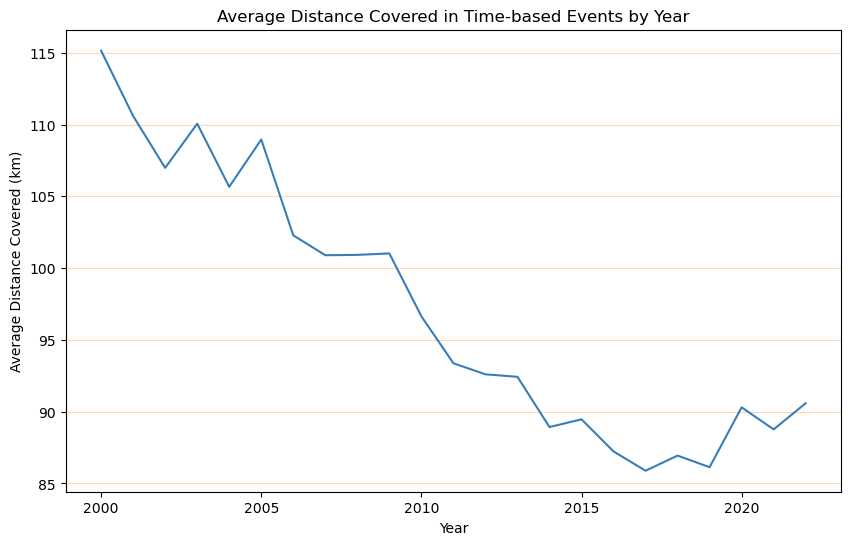

In [6]:
# Calculate average distance covered for each year in time-based events
average_distance_per_year = time_based_events.groupby('Year of event')['Distance Covered_km'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_distance_per_year, x='Year of event', y='Distance Covered_km', color="#377eb8")
plt.title('Average Distance Covered in Time-based Events by Year')
plt.xlabel('Year')
plt.ylabel('Average Distance Covered (km)')
plt.grid(axis='y', linestyle='-', color='#ff7f00', alpha = 0.3)  # Add horizontal grid lines
plt.show()

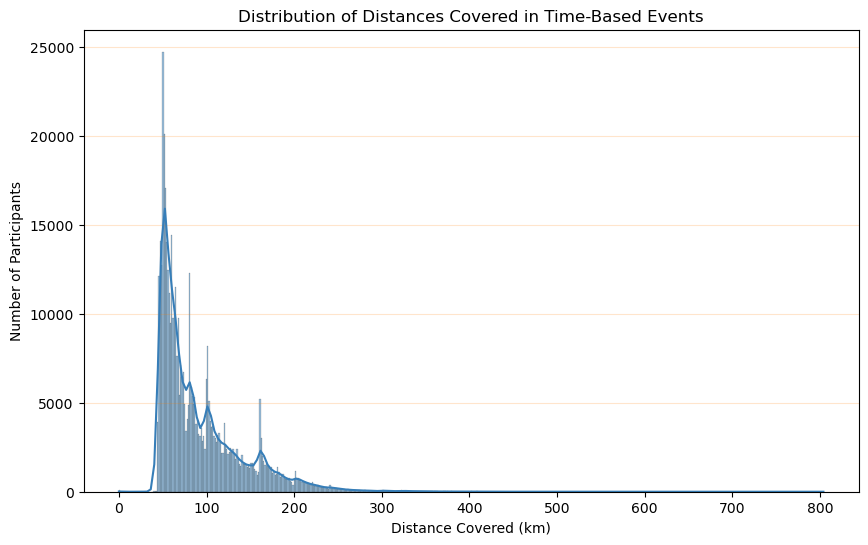

In [7]:
# Histogram of distances covered
plt.figure(figsize=(10, 6))
sns.histplot(time_based_events_clean['Distance Covered_km'], kde=True, color="#377eb8")
plt.title('Distribution of Distances Covered in Time-Based Events')
plt.xlabel('Distance Covered (km)')
plt.ylabel('Number of Participants')
plt.grid(axis='y', linestyle='-', color='#ff7f00', alpha = 0.2)  # Add horizontal grid lines
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


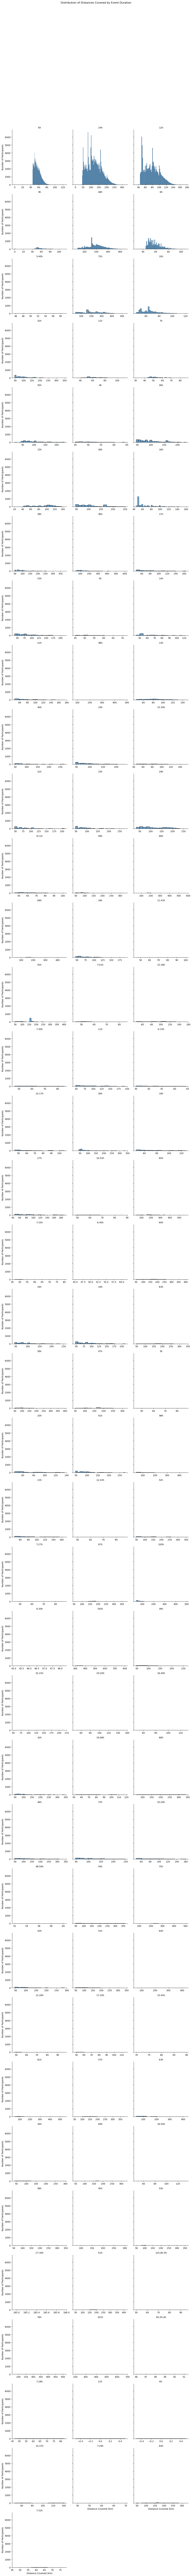

In [8]:
# Ensure that the event durations are in a format that allows easy grouping (e.g., '6h', '12h', '24h')
# Assuming 'time_based_events_clean' already contains the 'Distance Covered_km' column

# Plotting separate histograms for each event duration category
g = sns.FacetGrid(time_based_events_clean, col="Event distance/length", col_wrap=3, height=4, sharex=False)
g.map(sns.histplot, "Distance Covered_km", color="#377eb8")

g.set_titles("{col_name}")
g.set_axis_labels("Distance Covered (km)", "Number of Participants")
g.fig.suptitle('Distribution of Distances Covered by Event Duration', y=1.05)  # Adjust title and top margin

plt.show()

In [9]:
# Summing the number of finishers for each event duration category
participants_by_duration = time_based_events_clean.groupby('Event distance/length')['Event number of finishers'].sum().reset_index()

# Sorting to find the durations with the highest number of finishers
top_durations = participants_by_duration.sort_values('Event number of finishers', ascending=False).head(3)

print(top_durations)

   Event distance/length  Event number of finishers
32                   24h                   13223517
9                    12h                    8721539
83                    6h                    8272032


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_267/3112584411.py:15: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()
/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


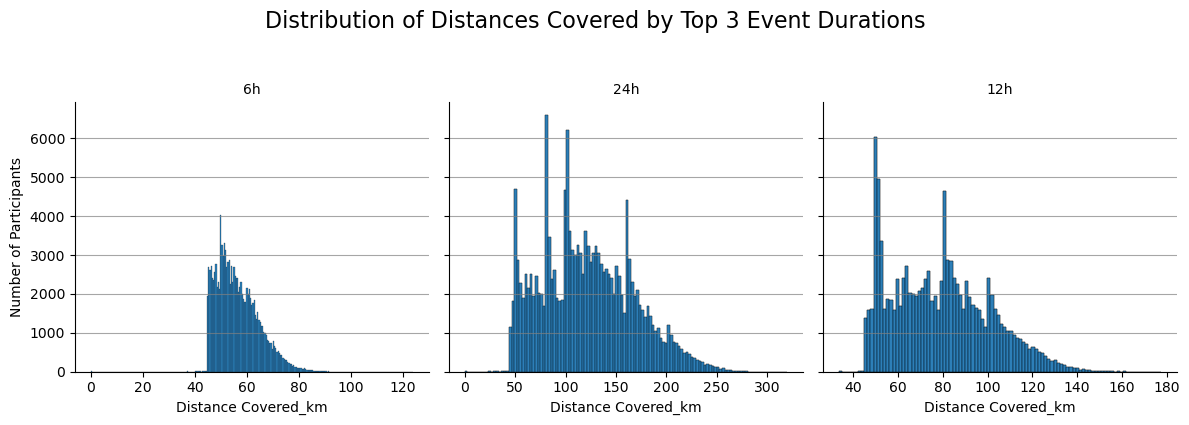

In [10]:
# Filter to include only top 5 durations
top_durations_list = top_durations['Event distance/length'].tolist()
time_based_events_top = time_based_events_clean[time_based_events_clean['Event distance/length'].isin(top_durations_list)]

# Adjusting FacetGrid to have one column and adding borders to histograms
g = sns.FacetGrid(time_based_events_top, col="Event distance/length", col_wrap=3, height=4, sharex=False)

# Mapping the histplot function with additional styling for borders
g.map(sns.histplot, "Distance Covered_km")

g.set_titles("{col_name}")
g.set_axis_labels("Distance Covered (km)", "Number of Participants")
g.fig.suptitle('Distribution of Distances Covered by Top 3 Event Durations', y=1.05, fontsize=16)

g.fig.tight_layout()

# Define custom plotting function to include gridlines
def plot_hist_with_grid(x, **kwargs):
    ax = sns.histplot(x, **kwargs)
    ax.grid(axis='y', linestyle='-', color='grey', alpha=0.7)  # Customize gridline appearance here

# Mapping the custom function with additional styling for borders
g.map(plot_hist_with_grid, "Distance Covered_km")

plt.show()

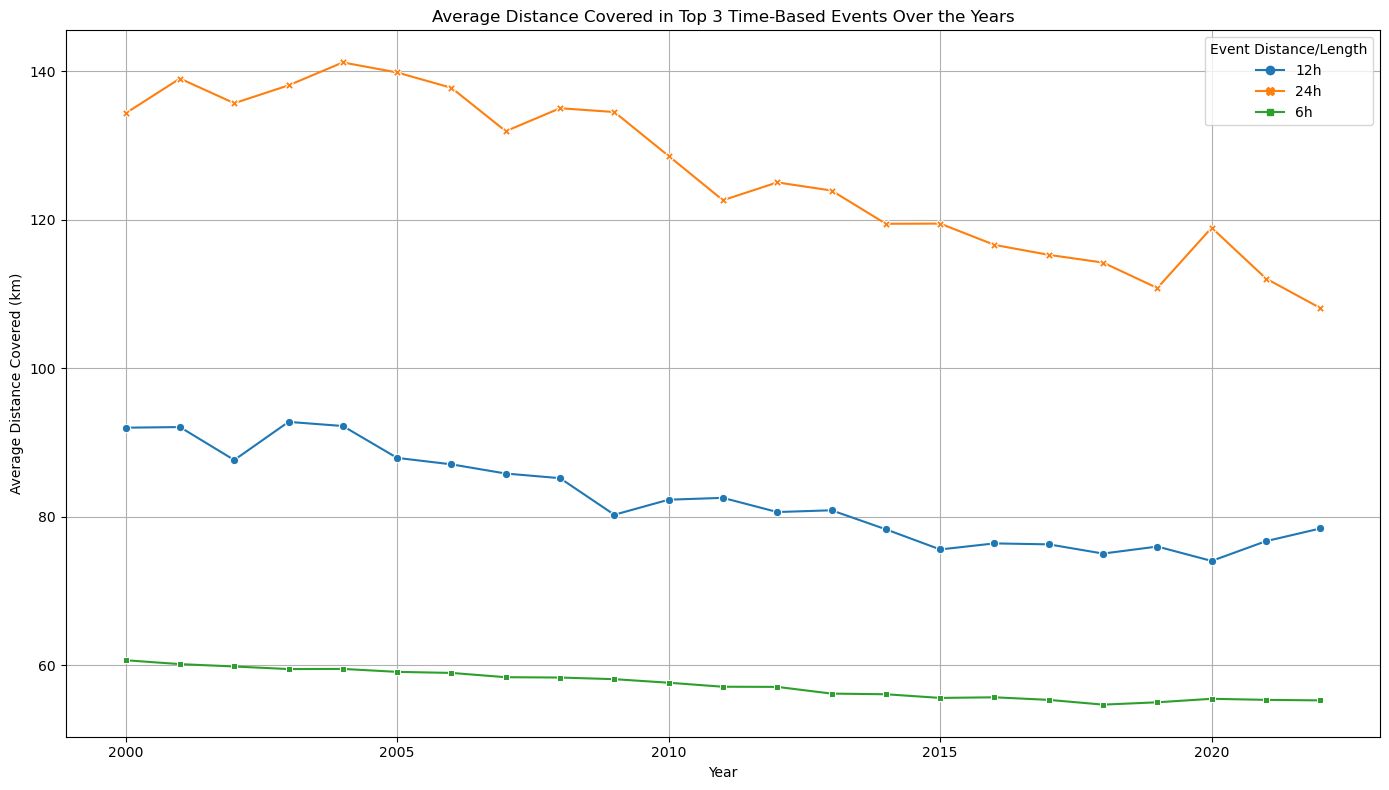

In [11]:
# Grouping data by 'Year of event' and 'Event distance/length' to calculate the mean distance covered
average_distance_per_year_and_event = time_based_events_top.groupby(['Year of event', 'Event distance/length'])['Distance Covered_km'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=average_distance_per_year_and_event, x='Year of event', y='Distance Covered_km', hue='Event distance/length', style='Event distance/length', markers=True, dashes=False)
plt.title('Average Distance Covered in Top 3 Time-Based Events Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Distance Covered (km)')
plt.legend(title='Event Distance/Length')
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


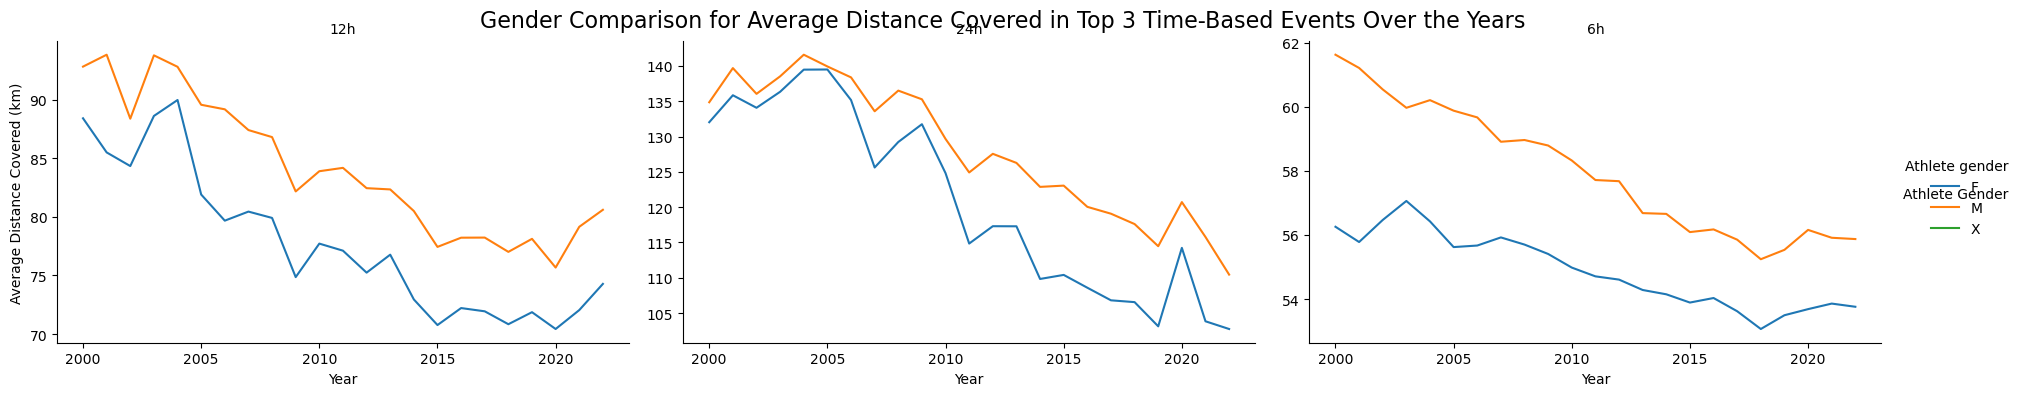

In [12]:
# Grouping data by 'Year of event', 'Event distance/length', and 'Athlete Gender' to calculate the mean distance covered
average_distance_per_year_event_gender = time_based_events_top.groupby(['Year of event', 'Event distance/length', 'Athlete gender'])['Distance Covered_km'].mean().reset_index()

g = sns.relplot(data=average_distance_per_year_event_gender, x='Year of event', y='Distance Covered_km', col='Event distance/length', hue='Athlete gender', kind='line', col_wrap=3, height=4, aspect=1.5, facet_kws={'sharey': False, 'sharex': True})
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Average Distance Covered (km)")
g.add_legend(title="Athlete Gender")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Gender Comparison for Average Distance Covered in Top 3 Time-Based Events Over the Years', fontsize=16)
plt.show()

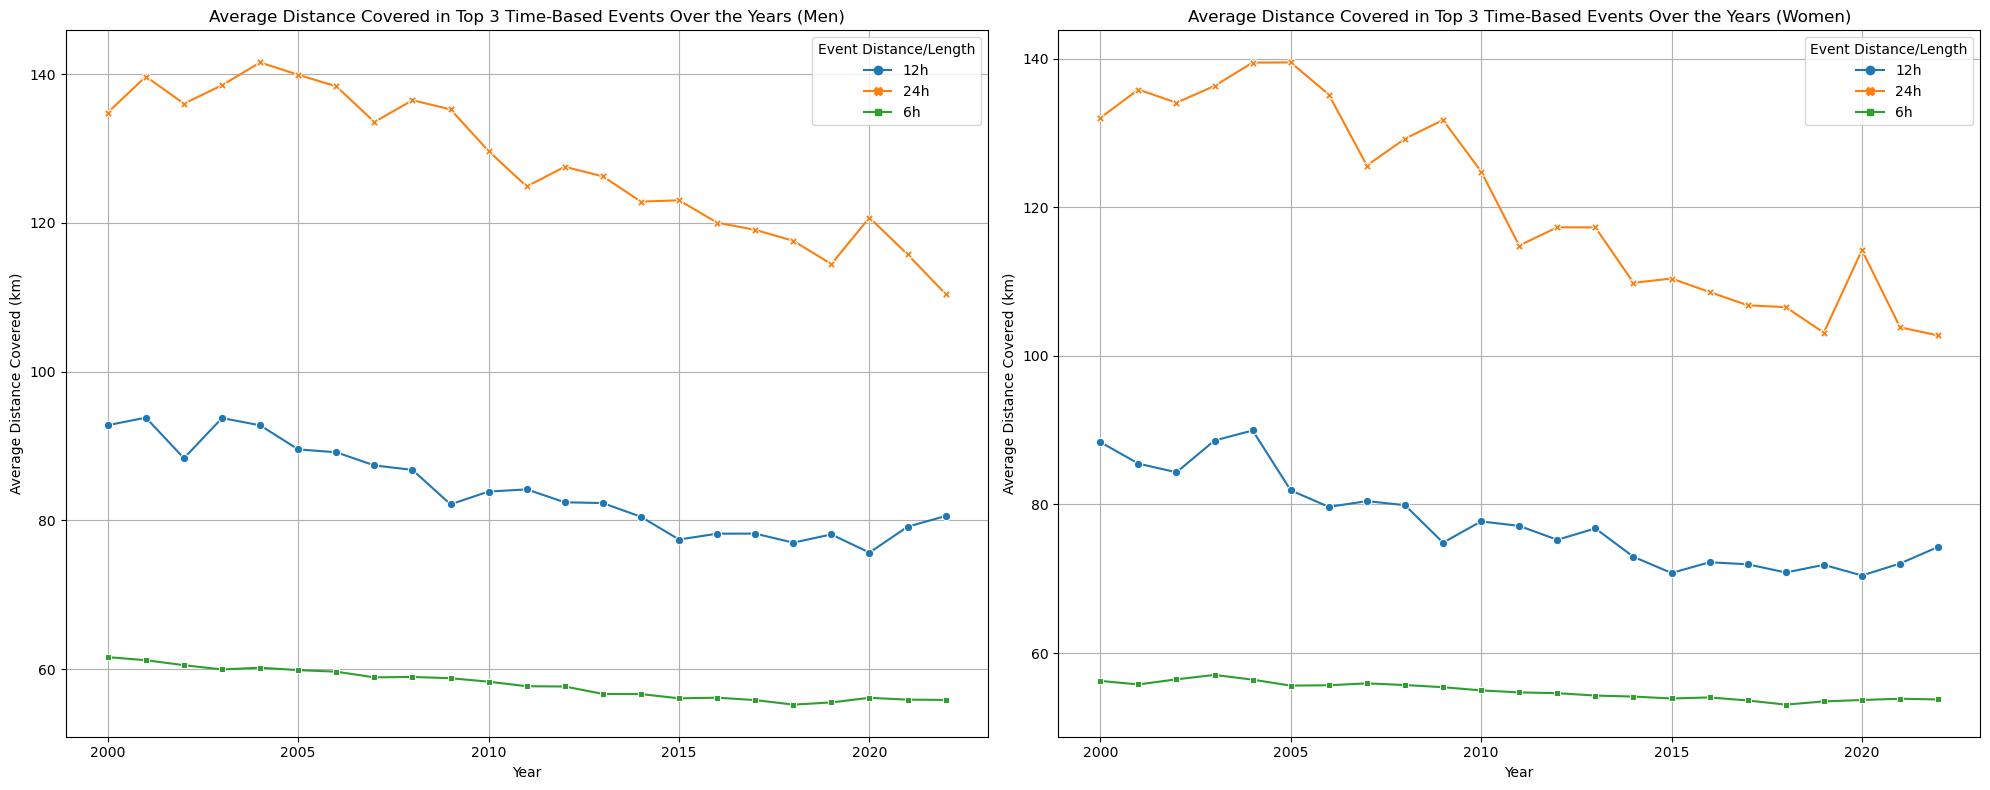

In [13]:
# Filtering the dataset for top 5 time-based events and then separating by gender for Men and Women
time_based_events_top_men = time_based_events_top[time_based_events_top['Athlete gender'] == 'M']
time_based_events_top_women = time_based_events_top[time_based_events_top['Athlete gender'] == 'F']

# Grouping data by 'Year of event' and 'Event distance/length' for men and women separately
average_distance_per_year_and_event_men = time_based_events_top_men.groupby(['Year of event', 'Event distance/length'])['Distance Covered_km'].mean().reset_index()
average_distance_per_year_and_event_women = time_based_events_top_women.groupby(['Year of event', 'Event distance/length'])['Distance Covered_km'].mean().reset_index()

# Setting up the matplotlib figure
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting for men
sns.lineplot(data=average_distance_per_year_and_event_men, x='Year of event', y='Distance Covered_km', hue='Event distance/length', style='Event distance/length', markers=True, dashes=False, ax=axs[0])
axs[0].set_title('Average Distance Covered in Top 3 Time-Based Events Over the Years (Men)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Distance Covered (km)')
axs[0].legend(title='Event Distance/Length')
axs[0].grid(True)

# Plotting for women
sns.lineplot(data=average_distance_per_year_and_event_women, x='Year of event', y='Distance Covered_km', hue='Event distance/length', style='Event distance/length', markers=True, dashes=False, ax=axs[1])
axs[1].set_title('Average Distance Covered in Top 3 Time-Based Events Over the Years (Women)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Distance Covered (km)')
axs[1].legend(title='Event Distance/Length')
axs[1].grid(True)

plt.tight_layout()
plt.show()

<Figure size 900x600 with 0 Axes>

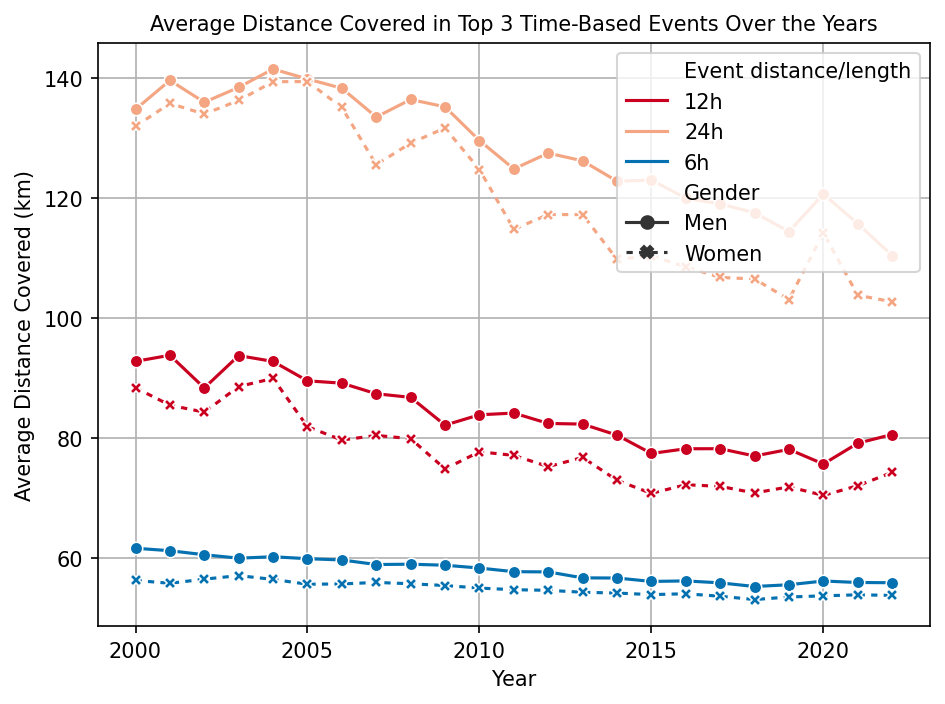

In [14]:
# Combining the datasets for men and women
combined_data = pd.concat([average_distance_per_year_and_event_men.assign(Gender='Men'),
                           average_distance_per_year_and_event_women.assign(Gender='Women')])

# Setting up the matplotlib figure
plt.figure(figsize=(9, 6))

custom_palette = {
    '12h': '#ca0020',  
    '24h': '#f4a582', 
    '6h': '#0571b0'   
}

matplotlib.rcParams['figure.dpi']

# Adjust DPI for a new figure
plt.figure(dpi=150)  # Adjust as needed for your display

# Plotting combined data
sns.lineplot(data=combined_data, x='Year of event', y='Distance Covered_km', hue='Event distance/length', style='Gender', markers=True, 
             dashes={'Men': '', 'Women': (2, 2)}, palette=custom_palette, ax=plt.gca())

plt.title('Average Distance Covered in Top 3 Time-Based Events Over the Years', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Distance Covered (km)', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()

# Save the figure with a specific DPI
plt.savefig('figure 1.png', dpi=300)

plt.show()

<Figure size 1200x600 with 0 Axes>

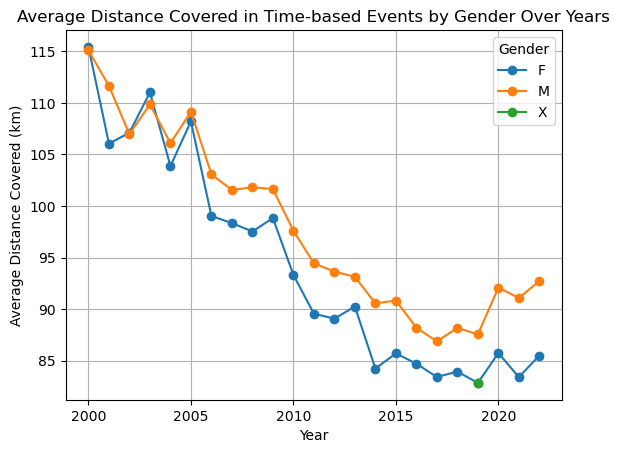

In [15]:
# Group by Year and Gender, then calculate the mean distance covered
average_distance_by_gender = time_based_events_clean.groupby(['Year of event', 'Athlete gender'])['Distance Covered_km'].mean().unstack()

plt.figure(figsize=(12, 6))
average_distance_by_gender.plot(kind='line', marker='o')
plt.title('Average Distance Covered in Time-based Events by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Average Distance Covered (km)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

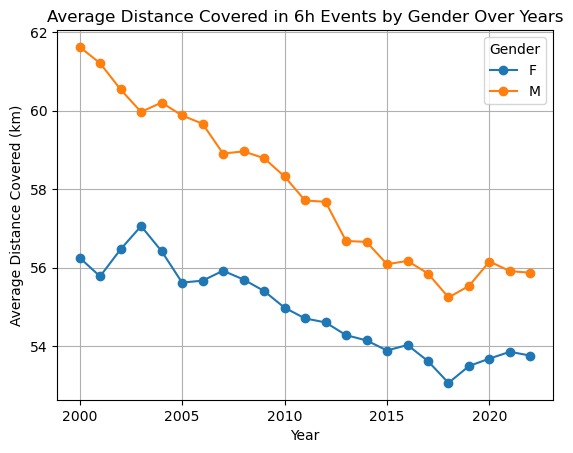

In [16]:
# Filter for 6-hour events
events_6h = time_based_events_clean[time_based_events_clean['Event distance/length'] == '6h']

# Group by Year and Gender, then calculate the mean distance covered for 6-hour events
average_distance_by_gender_6h = events_6h.groupby(['Year of event', 'Athlete gender'])['Distance Covered_km'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))
average_distance_by_gender_6h.plot(kind='line', marker='o')
plt.title('Average Distance Covered in 6h Events by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Average Distance Covered (km)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

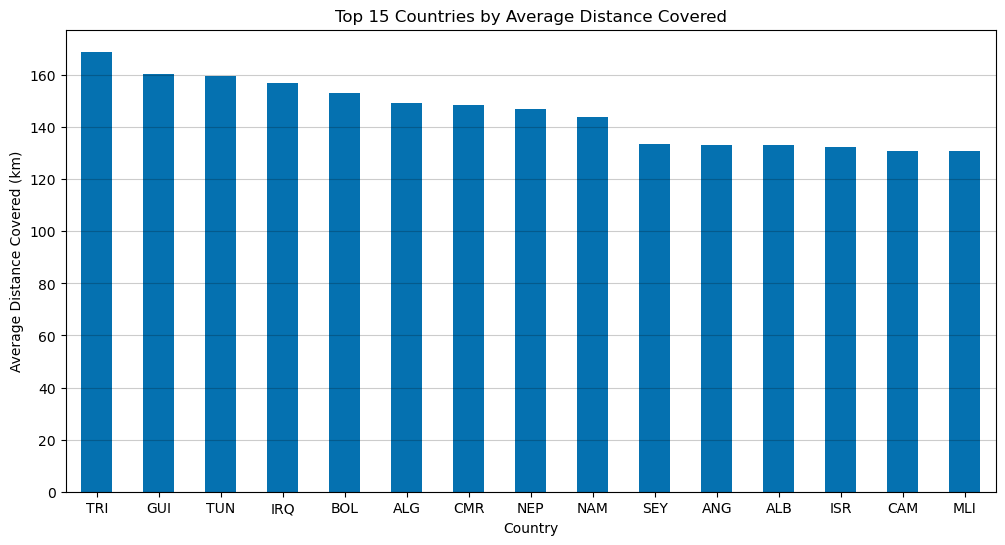

In [17]:
# Group by Country and calculate mean distance covered
average_distance_by_country = time_based_events_clean.groupby('Athlete country')['Distance Covered_km'].mean().sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 6))
average_distance_by_country.plot(kind='bar', color='#0571b0')
plt.title('Top 15 Countries by Average Distance Covered')
plt.xlabel('Country')
plt.ylabel('Average Distance Covered (km)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', color='black', alpha = 0.2)  # Add horizontal grid lines
plt.show()

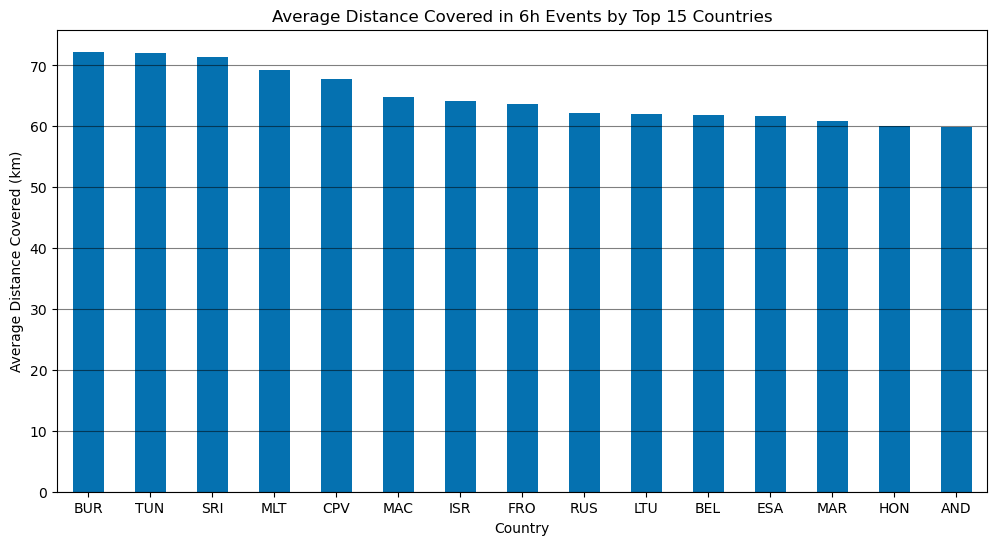

In [18]:
# Filter for 6-hour events
events_6h = time_based_events_clean[time_based_events_clean['Event distance/length'] == '6h']

# Group by Country and calculate mean distance covered for 6-hour events
average_distance_by_country_6h = events_6h.groupby('Athlete country')['Distance Covered_km'].mean().sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 6))
average_distance_by_country_6h.plot(kind='bar', color='#0571b0')
plt.title('Average Distance Covered in 6h Events by Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Average Distance Covered (km)')
plt.xticks(rotation=0)  # Rotate country labels for better readability
plt.grid(axis='y', linestyle='-', color='black', alpha = 0.5)  # Add horizontal grid lines
plt.show()

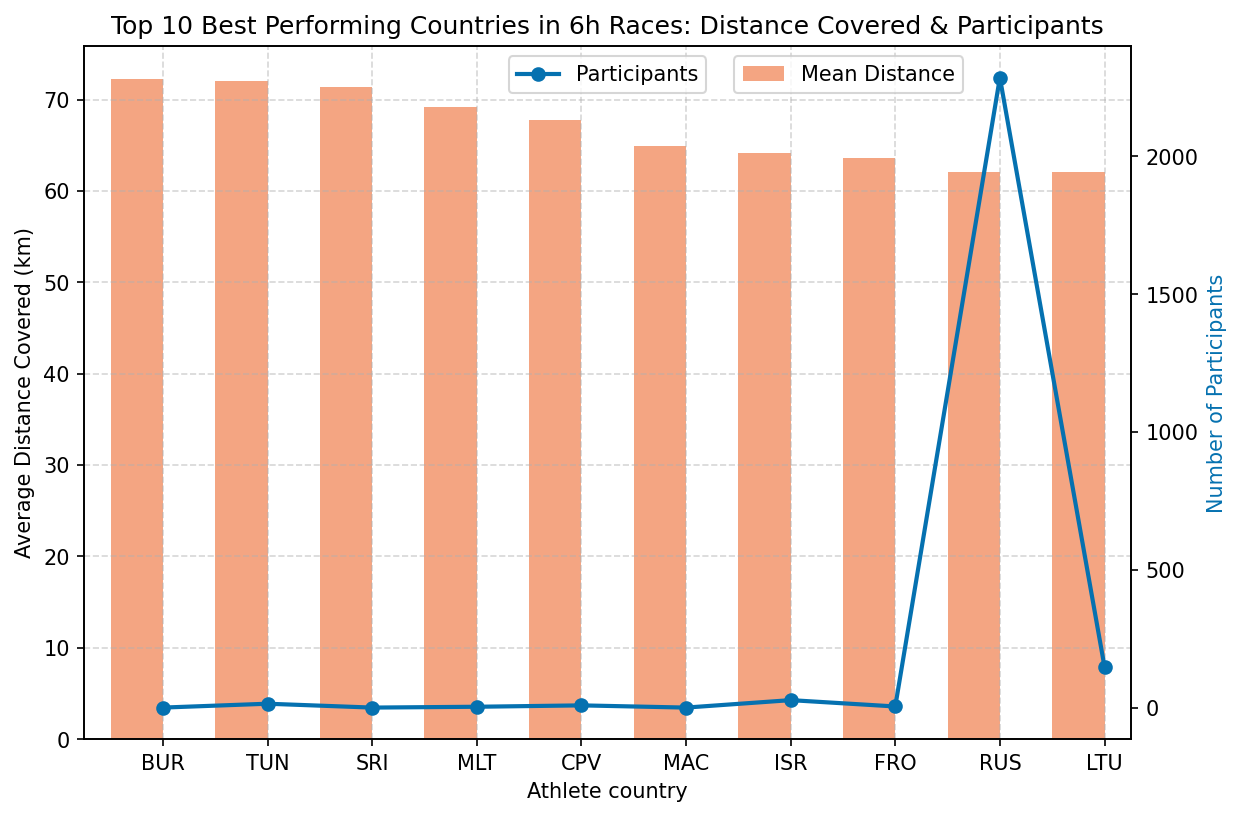

In [19]:
# Filter the dataset for 6-hour races
six_hour_races = time_based_events_clean[time_based_events_clean['Event distance/length'] == '6h']

# Group by country to get the mean distance covered and the number of participants
country_performance = six_hour_races.groupby('Athlete country').agg({
    'Distance Covered_km': 'mean',
    'Athlete ID': 'count'
}).rename(columns={'Distance Covered_km': 'Mean Distance', 'Athlete ID': 'Participants'})

# Sort by mean distance to get the top 10 countries
top_countries = country_performance.sort_values(by='Mean Distance', ascending=False).head(10)

matplotlib.rcParams['figure.dpi']

# Adjust DPI for a new figure
plt.figure(dpi=150)  # Adjust as needed for your display

# Bar plot for mean distance
ax = top_countries['Mean Distance'].plot(kind='bar', use_index=True, color='#f4a582', figsize=(9, 6), position=1)

# Line plot for the number of participants
ax2 = ax.twinx()
ax2.plot(top_countries['Participants'].values, color='#0571b0', marker='o', linewidth=2, label='Participants')

# Labels and title
ax.set_ylabel('Average Distance Covered (km)', color='black')
ax2.set_ylabel('Number of Participants', color='#0571b0')
ax.set_title('Top 10 Best Performing Countries in 6h Races: Distance Covered & Participants')
ax.set_xticklabels(top_countries.index, rotation=0)

# Grid and legend
ax.grid(linestyle='--', alpha=0.5)
ax.legend(loc='best', bbox_to_anchor=(0.25, 0.75, 0.6, 0.25))
ax2.legend(loc='upper center')

# Save the figure with a specific DPI
plt.savefig('figure 2.png', dpi=300)

plt.show()


In [20]:
time_based_events_clean = time_based_events_clean.copy()

# Drop rows where 'Athlete age category' is NaN to ensure the extraction works as expected
time_based_events_clean.dropna(subset=['Athlete age category'], inplace=True)

# Extract numerical age part
time_based_events_clean['Numeric Age'] = time_based_events_clean['Athlete age category'].str.extract('(\d+)')

# Convert to int, drop NaN values to avoid ValueError
time_based_events_clean.dropna(subset=['Numeric Age'], inplace=True)
time_based_events_clean['Numeric Age'] = time_based_events_clean['Numeric Age'].astype(int)

# Define age bins and labels for the categories
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Categorize ages into broader groups
time_based_events_clean['Age Group'] = pd.cut(time_based_events_clean['Numeric Age'], bins=age_bins, labels=age_labels, right=False)

# Verify the new categorization
print(time_based_events_clean[['Athlete age category', 'Numeric Age', 'Age Group']].head())

   Athlete age category  Numeric Age Age Group
22                  M50           50     51-60
23                  M23           23     21-30
24                 MU23           23     21-30
25                  M60           60     61-70
27                  M23           23     21-30


In [21]:
# Filtering out any placeholder values (assuming -1 was used for NaNs)
valid_age_groups = time_based_events_clean[time_based_events_clean['Numeric Age'] > 0]

# Finding the lowest non-empty age group
lowest_age_group = valid_age_groups['Age Group'].min()

print(f"The lowest age group that participates is: {lowest_age_group}")

The lowest age group that participates is: 21-30


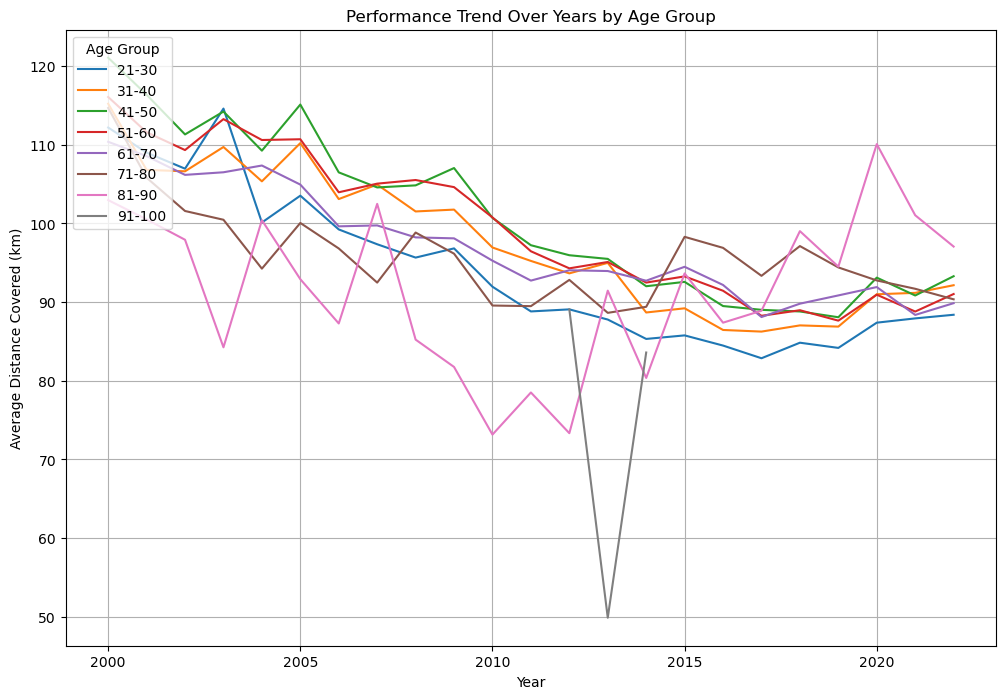

In [22]:
# Group by Year and new Age Group, then calculate the mean distance covered
age_group_performance_trend = time_based_events_clean.groupby(['Year of event', 'Age Group'])['Distance Covered_km'].mean().unstack()

# Plotting
age_group_performance_trend.plot(kind='line', figsize=(12, 8))
plt.title('Performance Trend Over Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Average Distance Covered (km)')
plt.legend(title='Age Group', loc='upper left')
plt.grid(True)
plt.show()

In [23]:
# Calculate the frequency of each unique distance
distance_counts = distance_based_events['Event distance/length'].value_counts()

# Number of unique distances
num_unique_distances = distance_counts.shape[0]

# Top 5 distances based on frequency
top_5_distances = distance_counts.head(5)

print(f"Number of unique distances: {num_unique_distances}")
print("Top 5 distances:")
print(top_5_distances)
print("Total number of participants: ", distance_counts.sum())

Number of unique distances: 1945
Top 5 distances:
50km     1463611
100km     735515
50mi      297587
56km      223795
45km      154734
Name: Event distance/length, dtype: int64
Total number of participants:  6139079


In [24]:
# The top 3 distances make up for approximately 40.7% of the distance based events, so now we will focus only on those
# Define the top 3 distances
top_3_distances = ['50km', '100km', '50mi']

# Filter the DataFrame for these top 3 distances
distance_based_events_top_3 = distance_based_events[distance_based_events['Event distance/length'].isin(top_3_distances)]

# Now, distance_based_events_top_3 contains only the entries for the top 3 distances
print(f"Filtered dataset size: {len(distance_based_events_top_3)}")
print(distance_based_events_top_3.head())

Filtered dataset size: 2496713
   Year of event Event dates           Event name Event distance/length  \
0           2018  06.01.2018  Selva Costera (CHI)                  50km   
1           2018  06.01.2018  Selva Costera (CHI)                  50km   
2           2018  06.01.2018  Selva Costera (CHI)                  50km   
3           2018  06.01.2018  Selva Costera (CHI)                  50km   
4           2018  06.01.2018  Selva Costera (CHI)                  50km   

   Event number of finishers Athlete performance        Athlete club  \
0                         22           4:51:39 h               Tnfrc   
1                         22           5:15:45 h  Roberto Echeverría   
2                         22           5:16:44 h   Puro Trail Osorno   
3                         22           5:34:13 h            Columbia   
4                         22           5:54:14 h      Baguales Trail   

  Athlete country  Athlete year of birth Athlete gender Athlete age category  \
0    

In [25]:
def time_to_minutes(time_str):
    """Converts a time string with potential day, hour, minute, and second parts into total minutes."""
    # Check if the input is not a string (e.g., NaN values)
    if not isinstance(time_str, str):
        return 0  # Return 0 or an appropriate default value

    days = hours = minutes = seconds = 0
    # Check for and handle the presence of days
    if 'd' in time_str:
        parts = time_str.split('d')
        days = int(parts[0])
        time_str = parts[1].strip()
    if 'h' in time_str:
        time_str = time_str.replace(' h', '')
    
    parts = time_str.split(':')
    if len(parts) == 3:
        hours, minutes, seconds = map(int, parts)
    elif len(parts) == 2:
        hours, minutes = map(int, parts)
    elif len(parts) == 1 and parts[0]:
        hours = int(parts[0])  # Assuming isolated numbers represent hours

    total_minutes = (days * 24 * 60) + (hours * 60) + minutes + (seconds / 60)
    return total_minutes

# Apply the adjusted conversion function to 'Athlete performance'
distance_based_events_top_3['Performance Minutes'] = distance_based_events_top_3['Athlete performance'].apply(time_to_minutes)

# Check for error
print(distance_based_events_top_3[['Athlete performance', 'Performance Minutes']].head())

# Sort the DataFrame in descending order based on the "Performance Minutes" column
distance_based_events_top_3_sorted = distance_based_events_top_3.sort_values(by='Performance Minutes', ascending=False)

# Print the sorted DataFrame
print(distance_based_events_top_3_sorted[['Athlete performance', 'Performance Minutes']].head())


/tmp/ipykernel_267/1032264764.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_based_events_top_3['Performance Minutes'] = distance_based_events_top_3['Athlete performance'].apply(time_to_minutes)


  Athlete performance  Performance Minutes
0           4:51:39 h           291.650000
1           5:15:45 h           315.750000
2           5:16:44 h           316.733333
3           5:34:13 h           334.216667
4           5:54:14 h           354.233333
        Athlete performance  Performance Minutes
7194         10d 20:14:00 h         15614.000000
3016630       4d 03:37:23 h          5977.383333
2463418       3d 15:04:10 h          5224.166667
2463417       3d 13:56:06 h          5156.100000
3942185       3d 11:21:08 h          5001.133333


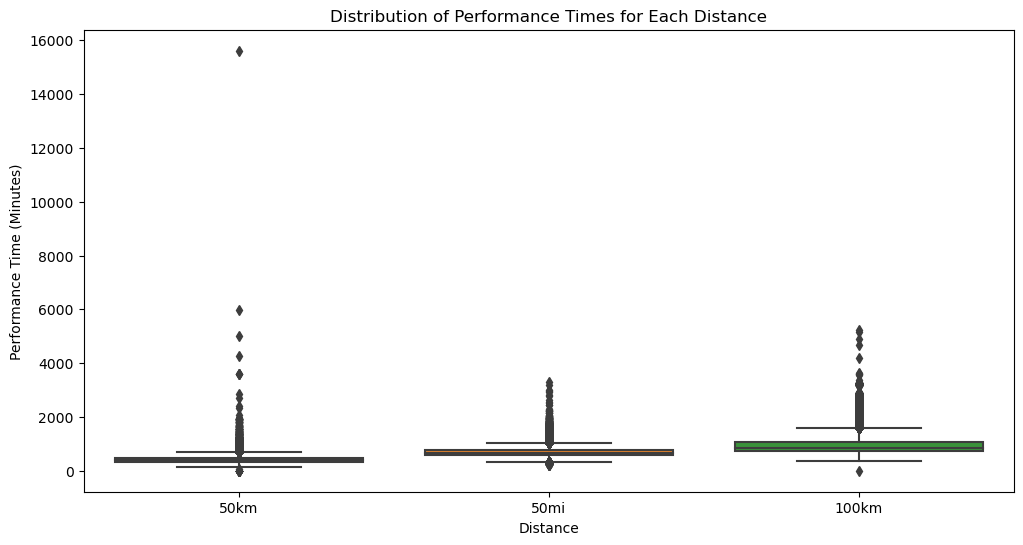

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=distance_based_events_top_3, x='Event distance/length', y='Performance Minutes')
plt.title('Distribution of Performance Times for Each Distance')
plt.xlabel('Distance')
plt.ylabel('Performance Time (Minutes)')
plt.show()

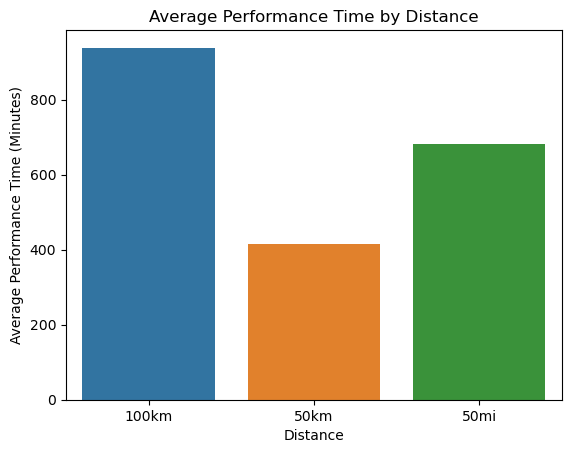

In [27]:
# Step 1: Calculate the average performance for each country
average_performance_by_distance = distance_based_events_top_3_sorted.groupby('Event distance/length')['Performance Minutes'].mean().reset_index()

sns.barplot(data=average_performance_by_distance, x='Event distance/length', y='Performance Minutes')
plt.title('Average Performance Time by Distance')
plt.xlabel('Distance')
plt.ylabel('Average Performance Time (Minutes)')
plt.show()

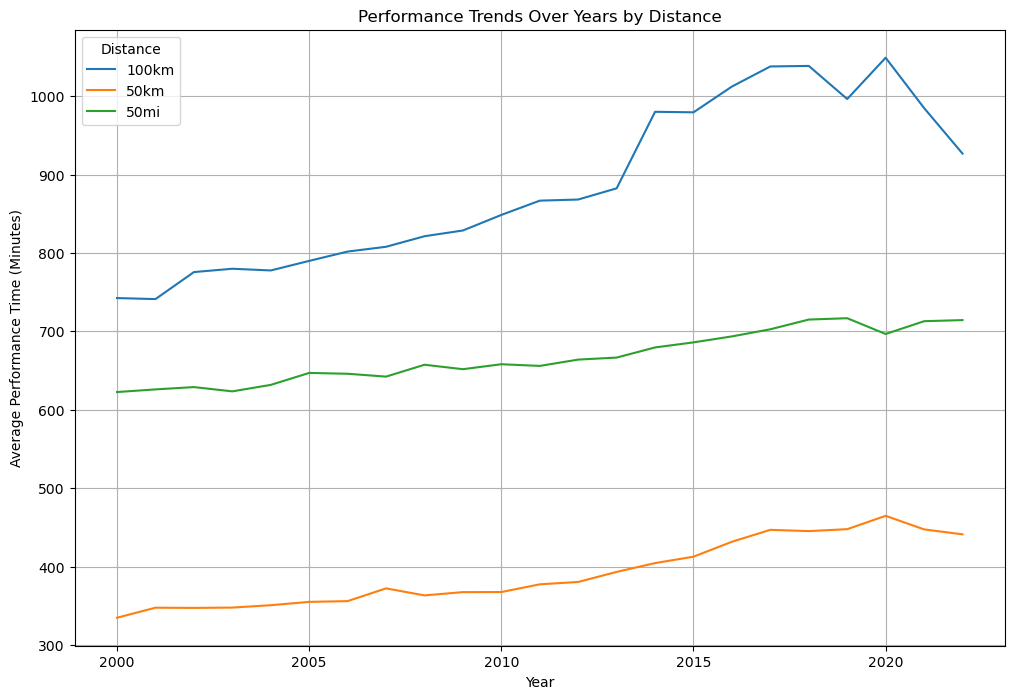

Index(['100km', '50km', '50mi'], dtype='object', name='Event distance/length')


In [28]:
performance_trends = distance_based_events_top_3.groupby(['Year of event', 'Event distance/length'])['Performance Minutes'].mean().unstack()

performance_trends.plot(figsize=(12, 8))
plt.title('Performance Trends Over Years by Distance')
plt.xlabel('Year')
plt.ylabel('Average Performance Time (Minutes)')
plt.legend(title='Distance')
plt.grid(True)
plt.show()
print(performance_trends.columns)

<Figure size 960x720 with 0 Axes>

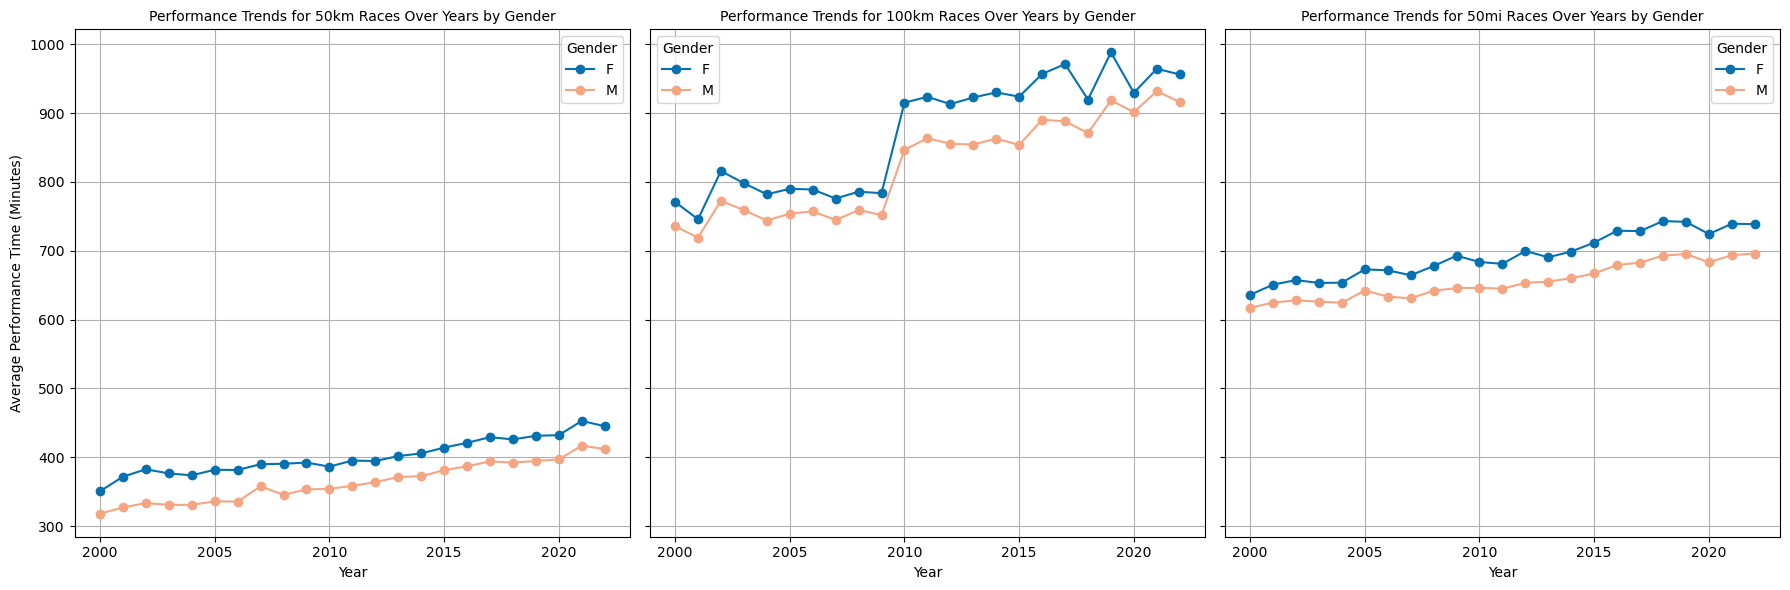

Index(['100km', '50km', '50mi'], dtype='object', name='Event distance/length')


In [29]:
# Define the top 3 distances
top_3_distances = ['50km', '100km', '50mi']

matplotlib.rcParams['figure.dpi']

# Adjust DPI for a new figure
plt.figure(dpi=150)  # Adjust as needed for your display

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True)

colors = ['#0571b0', '#f4a582']  

for i, distance in enumerate(top_3_distances):
    # Filter for the specific distance and for genders 'M' and 'F' only
    df_filtered = distance_based_events_top_3[
        (distance_based_events_top_3['Event distance/length'] == distance) &
        (distance_based_events_top_3['Athlete gender'].isin(['M', 'F']))
    ].dropna()

    # Group by 'Year of event' and 'Athlete gender', then calculate the mean performance time
    performance_trends_gender = df_filtered.groupby(['Year of event', 'Athlete gender'])['Performance Minutes'].mean().unstack('Athlete gender')

    # Plotting on the respective subplot
    ax = axes[i]
    performance_trends_gender.plot(ax=ax, marker='o', color=colors)
    ax.set_title(f'Performance Trends for {distance} Races Over Years by Gender', fontsize=10)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Average Performance Time (Minutes)', fontsize=10)
    ax.legend(title='Gender', fontsize=10)
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure with a specific DPI
plt.savefig('figure 3.png', dpi=600)

plt.show()

print(performance_trends.columns)



In [30]:
# Filter the DataFrame for 50km and 100km races and for the years 2000 and 2022
filtered_data = distance_based_events_top_3[
    (distance_based_events_top_3['Event distance/length'].isin(['50km', '100km'])) &
    (distance_based_events_top_3['Year of event'].isin([2000, 2022])) &
    (distance_based_events_top_3['Athlete gender'].isin(['M', 'F']))
]

# Group by distance, year, and gender, then calculate the mean performance time
grouped_data = filtered_data.groupby(['Event distance/length', 'Year of event', 'Athlete gender'])['Performance Minutes'].mean().unstack('Athlete gender')

# Calculate the percentage difference between men's and women's performance times for each distance and year
percentage_diff = ((grouped_data['F'] - grouped_data['M']) / grouped_data['M']) * 100

# The 'percentage_diff' will hold the percentage differences for each distance and each year

print(percentage_diff.head())

Event distance/length  Year of event
100km                  2000              6.670548
                       2022              6.817742
50km                   2000             11.586543
                       2022              6.281199
dtype: float64


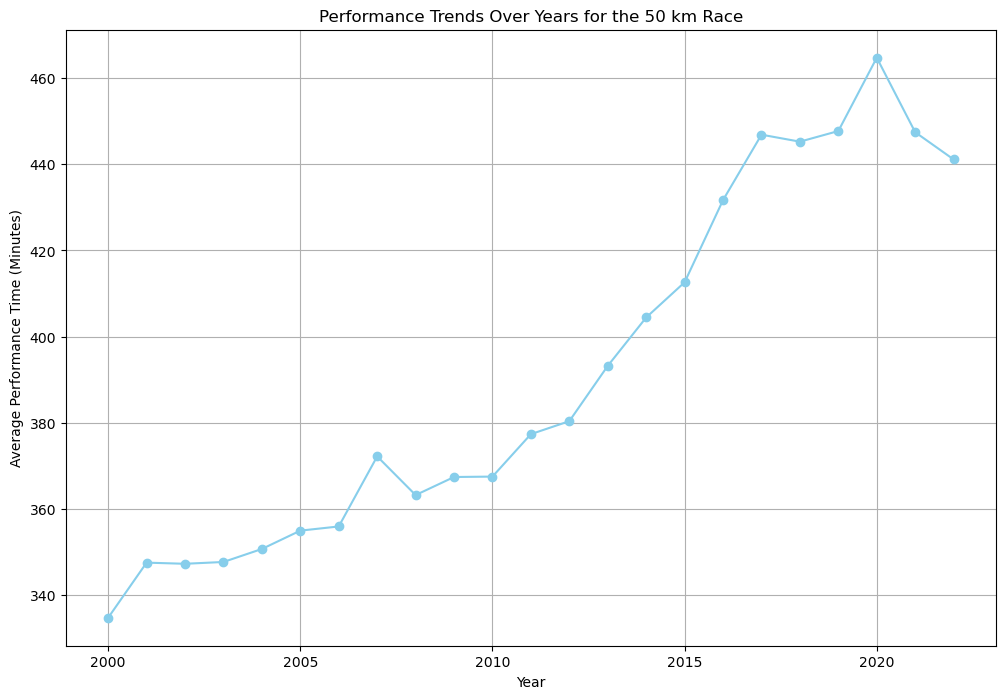

In [31]:
# Filter performance_trends DataFrame to include only the '50km' distance
performance_trends_50km = performance_trends['50km']

# Plot performance trends for the 50km distance
plt.figure(figsize=(12, 8))
performance_trends_50km.plot(marker='o', color='skyblue')
plt.title('Performance Trends Over Years for the 50 km Race')
plt.xlabel('Year')
plt.ylabel('Average Performance Time (Minutes)')
plt.grid(True)
plt.show()

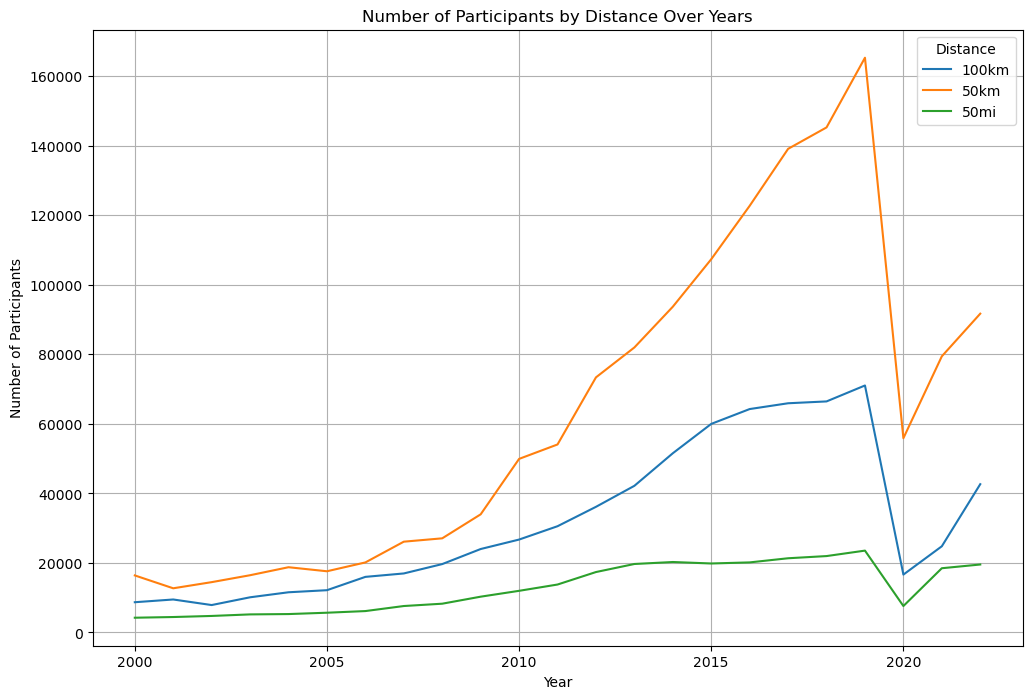

In [32]:
participants_by_distance = distance_based_events_top_3.groupby(['Year of event', 'Event distance/length']).size().unstack()

participants_by_distance.plot(kind='line', figsize=(12, 8))
plt.title('Number of Participants by Distance Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Distance')
plt.grid(True)
plt.show()

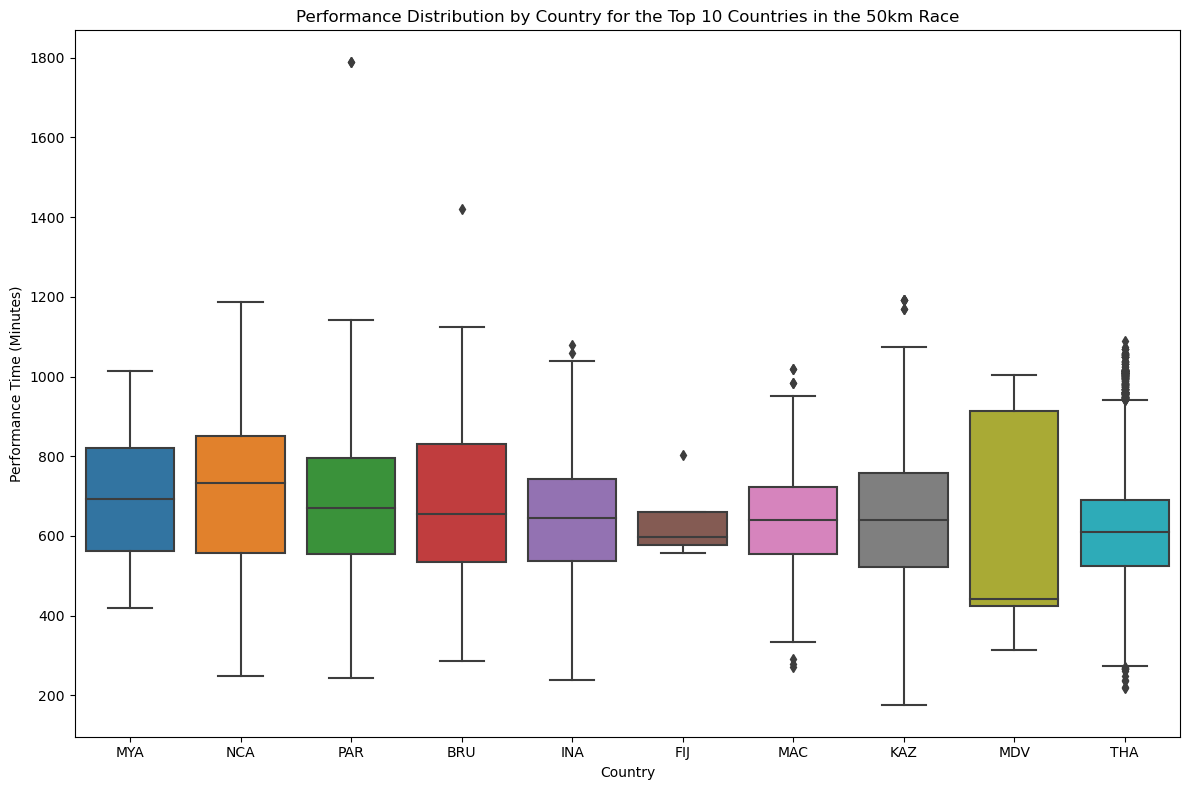

In [33]:
avg_performance_by_distance = distance_based_events_top_3.groupby('Event distance/length')['Performance Minutes'].mean().reset_index()

# Filter for 50 km events
distance_50km = distance_based_events_top_3[distance_based_events_top_3['Event distance/length'] == '50km'].copy()

# Identify the top 10 countries by average performance
top_countries = distance_50km.groupby('Athlete country')['Performance Minutes'].mean().nlargest(10).index.tolist()

# Filter the dataset for these top countries for further analysis
top_countries_data = distance_50km[distance_50km['Athlete country'].isin(top_countries)]

# Visualization of performance distribution by country
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_countries_data, x='Athlete country', y='Performance Minutes', order=top_countries)
plt.title('Performance Distribution by Country for the Top 10 Countries in the 50km Race')
plt.xlabel('Country')
plt.ylabel('Performance Time (Minutes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [34]:
# Count the occurrences of each gender
gender_counts = distance_50km['Athlete gender'].value_counts()

# Print the counts of each gender
print("Gender Counts:")
print(gender_counts)

Gender Counts:
M    1067723
F     395873
X         15
Name: Athlete gender, dtype: int64


<Figure size 1200x600 with 0 Axes>

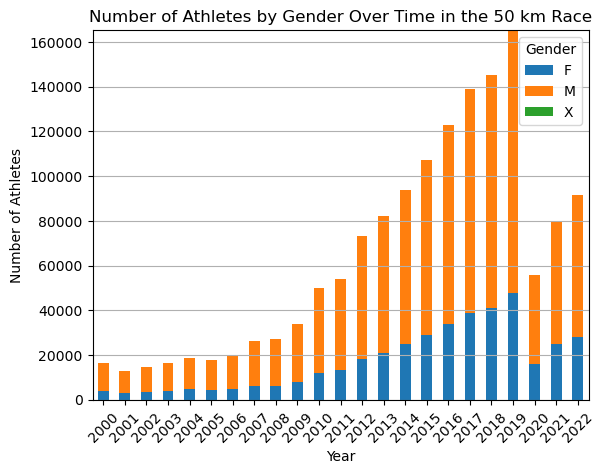

In [35]:
# Group the data by gender and event year, and count the number of occurrences
gender_year_counts = distance_50km.groupby(['Year of event', 'Athlete gender']).size().unstack(fill_value=0)

# Plot the number of each gender over the years
plt.figure(figsize=(12, 6))
gender_year_counts.plot(kind='bar', stacked=True)
plt.title('Number of Athletes by Gender Over Time in the 50 km Race')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.show()

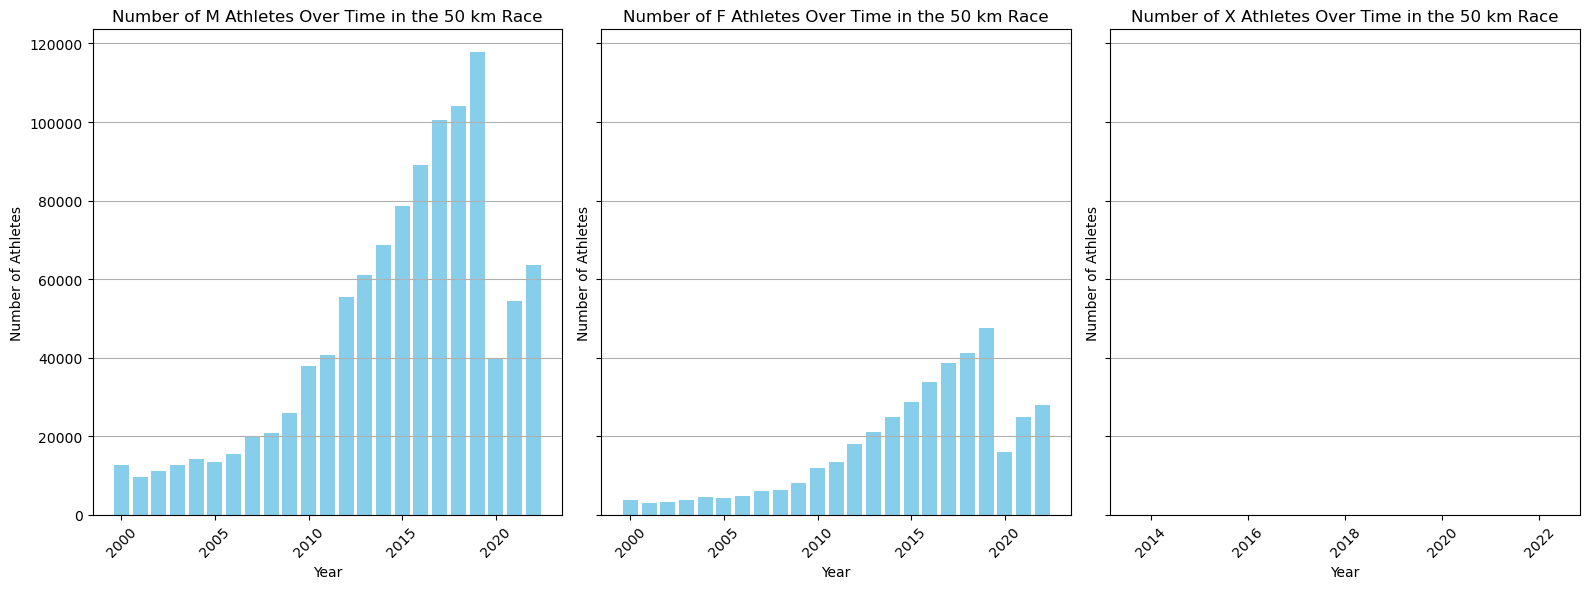

In [36]:
# Extract unique gender types
gender_types = distance_50km['Athlete gender'].unique()

# Set up subplots
fig, axes = plt.subplots(1, len(gender_types), figsize=(16, 6), sharey=True)

# Iterate over gender types and create separate plots
for i, gender in enumerate(gender_types):
    # Filter the data for the current gender directly from the cleaned DataFrame
    gender_data = distance_50km[distance_50km['Athlete gender'] == gender]
    
    # Group the filtered data by event year and count the number of occurrences
    gender_year_counts = gender_data.groupby('Year of event').size()
    
    # Plot the number of athletes for the current gender over the years
    axes[i].bar(gender_year_counts.index, gender_year_counts.values, color='skyblue')
    axes[i].set_title(f'Number of {gender} Athletes Over Time in the 50 km Race')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Athletes')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

In [37]:
# Filter for the year 2019
distance_50km_2019 = distance_50km[distance_50km['Year of event'] == 2019]

# Sort the athletes by their performance times in ascending order
sorted_athletes_2019 = distance_50km_2019.sort_values(by='Performance Minutes', ascending=True)

# The sorted DataFrame now contains the athletes ordered by their performance times for the 50km race in 2019
sorted_athletes_2019.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Performance Minutes
2343190,2019,01.09.2019,IAU 50km WC Brasov (ROU),50km,135,2:47:42 h,NaN,ESP,1988.0,M,M23,17.889,764900,167.700000
1904010,2019,20.04.2019,Two Oceans Marathon - 50km Split (RSA),50km,11967,2:48:21 h,Nedbank Running Club E...,ETH,1991.0,M,M23,17.82,665810,168.350000
2343191,2019,01.09.2019,IAU 50km WC Brasov (ROU),50km,135,2:48:26 h,NaN,RSA,1979.0,M,M40,17.811,133351,168.433333
1932434,2019,13.04.2019,Loskop Ultra Marathon 50km (RSA),50km,3195,2:48:56 h,Maxed - Kwazulu Natal,RSA,1974.0,M,M40,17.758,106247,168.933333
2343192,2019,01.09.2019,IAU 50km WC Brasov (ROU),50km,135,2:49:01 h,NaN,GBR,1994.0,M,M23,17.75,131413,169.016667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


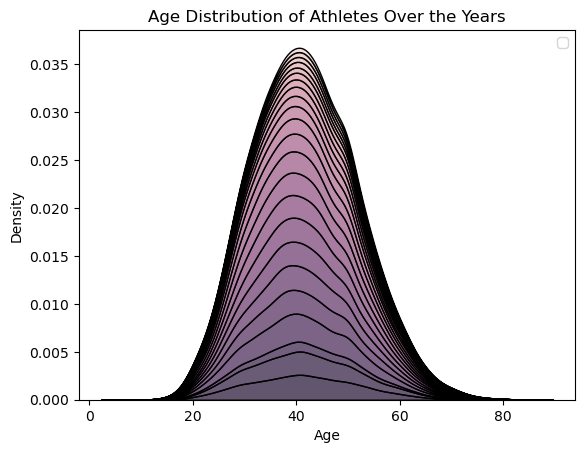

In [38]:
# Assuming 'Athlete year of birth' is accurate and 'Event dates' can provide the event year
df_filtered['Athlete age at event'] = df_filtered['Year of event'] - df_filtered['Athlete year of birth']
sns.kdeplot(data=df_filtered, x='Athlete age at event', hue='Year of event', multiple="stack")
plt.title('Age Distribution of Athletes Over the Years')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

<Figure size 960x720 with 0 Axes>

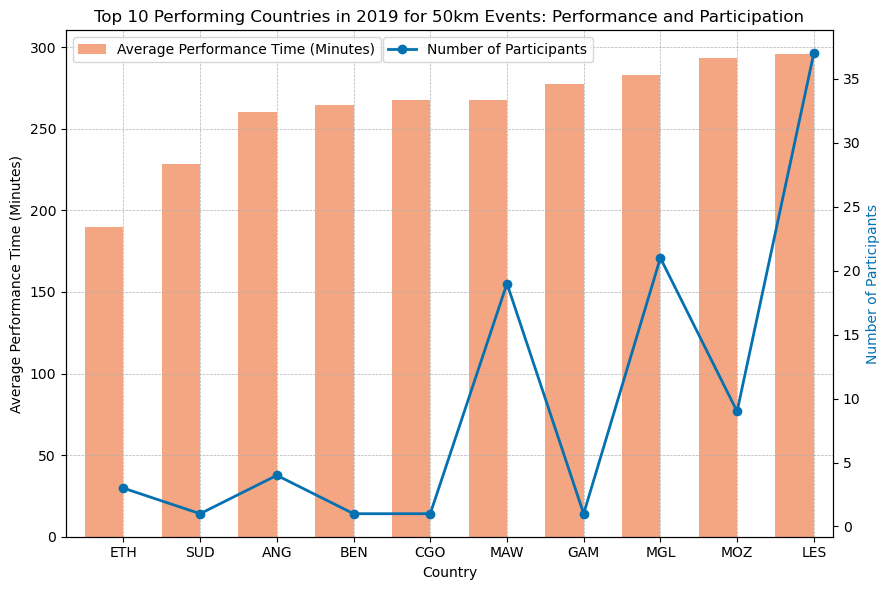

In [39]:
# Step 1: Filter for the year 2019
events_2019 = distance_50km[distance_50km['Year of event'] == 2019]

# Step 3: Group by country and calculate average performance
country_performance_2019 = events_2019.groupby('Athlete country')['Performance Minutes'].mean()

# Step 4: Sort the countries based on average performance
country_performance_2019_sorted = country_performance_2019.sort_values(ascending=True)

# Group by country again to count the number of participants
participants_by_country_2019 = events_2019.groupby('Athlete country').size()

# Extract Top 10 Performing Countries
top_10_countries_performance = country_performance_2019_sorted.head(10)
top_10_countries_participants = participants_by_country_2019[top_10_countries_performance.index]

# Set the countries as the x-axis
countries = top_10_countries_performance.index


default_dpi = matplotlib.rcParams['figure.dpi']

# Adjust DPI for a new figure
plt.figure(dpi=150)  # Adjust as needed for your display

# This time, use ax1 (the primary y-axis) for the number of participants, plotted as a line
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the average performance time (Mean Distance) as bars
top_10_countries_performance.plot(kind='bar', color='#f4a582', position=1, ax=ax, label='Average Performance Time (Minutes)')

# Create a secondary axis to plot the number of participants as a line plot
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), top_10_countries_participants.values, color='#0571b0', marker='o', linewidth=2, label='Number of Participants')

# Set the primary y-axis label
ax.set_ylabel('Average Performance Time (Minutes)', color='black', fontsize=10)

# Set the secondary y-axis label
ax2.set_ylabel('Number of Participants', color='#0571b0', fontsize=10)

# Set the x-axis label
ax.set_xlabel('Country', fontsize=10)

# Set title
ax.set_title('Top 10 Performing Countries in 2019 for 50km Events: Performance and Participation')

# Ensure the tick labels (countries) are set correctly on the x-axis
ax.set_xticklabels(top_10_countries_performance.index, rotation=0)

# Enable the grid, legend, and tight layout
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper center', bbox_to_anchor=(0.3, 0.5, 0.5, 0.5), fontsize=10)

plt.tight_layout()


# Save the figure with a specific DPI
plt.savefig('figure 4.png', dpi=300)

plt.show()


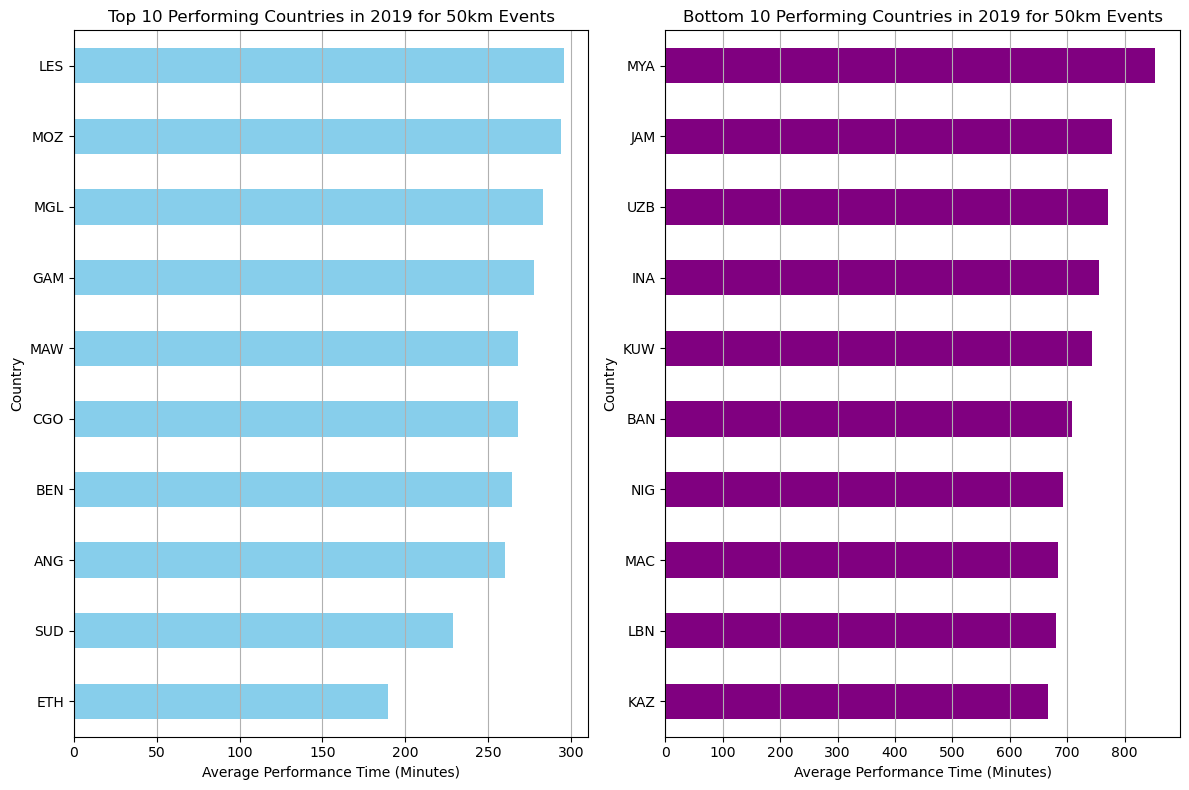

In [40]:
# Filter for the year 2019
events_2019 = distance_50km[distance_50km['Year of event'] == 2019].copy()

distance_50km_2019 = events_2019.copy()

# Group by country and calculate average performance
country_performance_2019 = distance_50km_2019.groupby('Athlete country')['Performance Minutes'].mean()

# Sort the countries based on average performance
country_performance_2019_sorted = country_performance_2019.sort_values(ascending=True)

num_countries_participated = distance_50km_2019['Athlete country'].nunique()

# Extract Top 10 Performing Countries
top_10_countries_performance = country_performance_2019_sorted.head(10)

# Extract Bottom 10 Performing Countries
bottom_10_countries_performance = country_performance_2019_sorted.tail(10)

# Visualization of Top 10 Countries
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # Subplot 1
top_10_countries_performance.plot(kind='barh', color='skyblue')
plt.title('Top 10 Performing Countries in 2019 for 50km Events')
plt.xlabel('Average Performance Time (Minutes)')
plt.ylabel('Country')
plt.grid(axis='x')

# Visualization of Bottom 10 Countries
plt.subplot(1, 2, 2)  # Subplot 2
bottom_10_countries_performance.plot(kind='barh', color='purple')
plt.title('Bottom 10 Performing Countries in 2019 for 50km Events')
plt.xlabel('Average Performance Time (Minutes)')
plt.ylabel('Country')
plt.grid(axis='x')

plt.tight_layout()
plt.show()